# Volatility Indicators in Crypto Markets
This notebook supports the first blog post in the series, exploring basic volatility metrics using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lib.volatility_metrics import (
    compute_log_returns,
    compute_rolling_mean,
    compute_rolling_std,
    compute_z_score,
    normalized_candle_height,
    range_over_price,
    rate_of_change,
    average_true_range,
    efficiency_ratio
)

In [2]:
# Load your dataset here (sample path)
df = pd.read_csv("../data/BTCBUSD-1h-data.csv", parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)
df = df[["open", "high", "low", "close"]]

In [3]:
window = 14

# Log returns
df["LogReturns"] = compute_log_returns(df["close"])

# Rolling stats
df["RollingMean"] = compute_rolling_mean(df["LogReturns"], window)
df["RollingStd"] = compute_rolling_std(df["LogReturns"], window)
df["ZScore"] = compute_z_score(df["LogReturns"], window)

# Normalized candle height
df["NormCandleHeight"] = normalized_candle_height(df["high"], df["low"], df["close"])

# Range over price (trend-aware)
df["RangeOverPrice"] = range_over_price(df["high"], df["low"], df["close"], window)

# Rate of change
df["ROC"] = rate_of_change(df["close"], window)

# ATR
df["ATR"] = average_true_range(df["high"], df["low"], df["close"], window)

# Efficiency ratio
df["EfficiencyRatio"] = efficiency_ratio(df["close"], window)

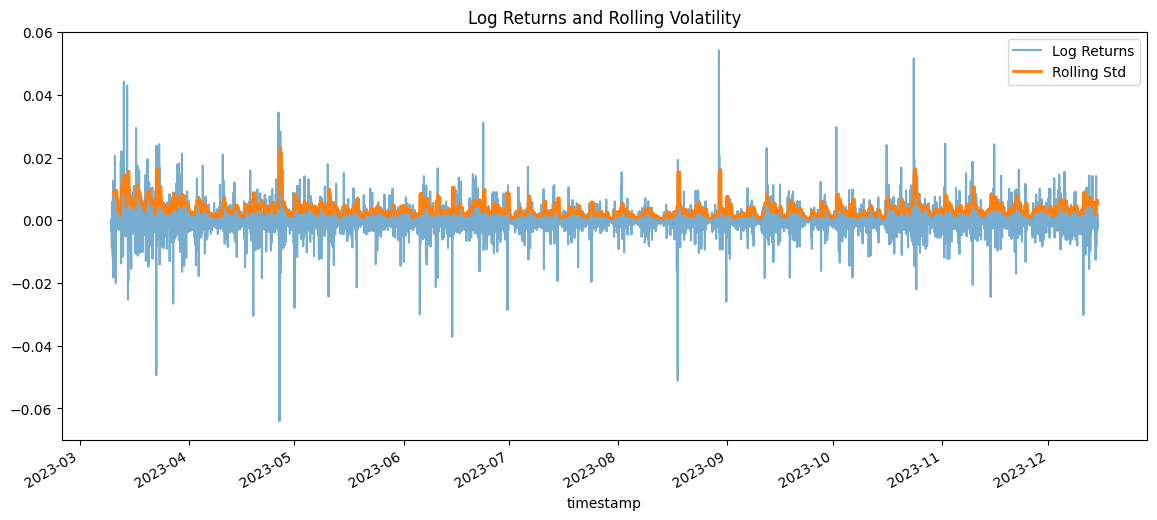

In [12]:
plt.figure(figsize=(14,6))
df["LogReturns"].plot(label="Log Returns", alpha=0.6)
df["RollingStd"].plot(label="Rolling Std", linewidth=2)
plt.title("Log Returns and Rolling Volatility")
plt.legend()
plt.savefig('../plots/LogReturns_vs_RollingStd.png')
plt.show()

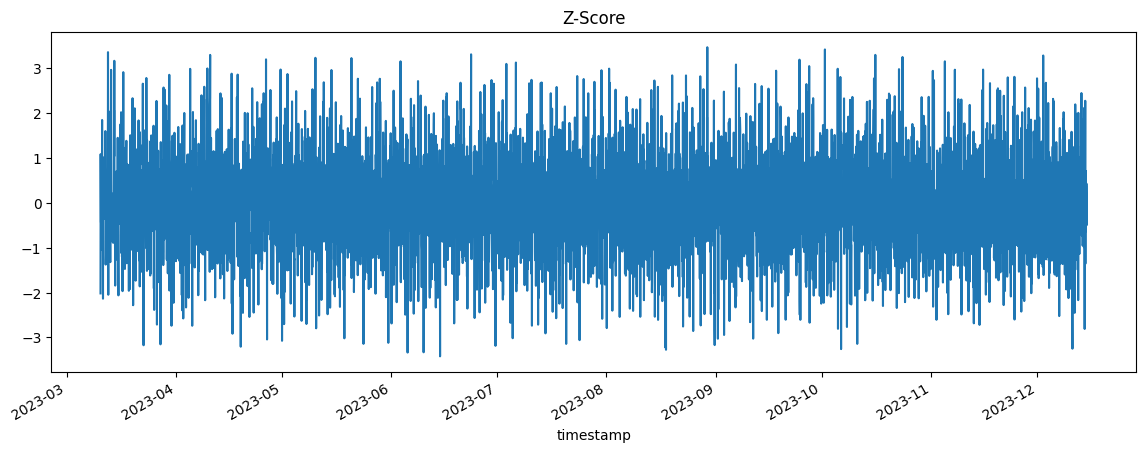

In [13]:
df["ZScore"].plot(figsize=(14,5), title="Z-Score")
plt.savefig('../plots/ZScore.png')
plt.show()

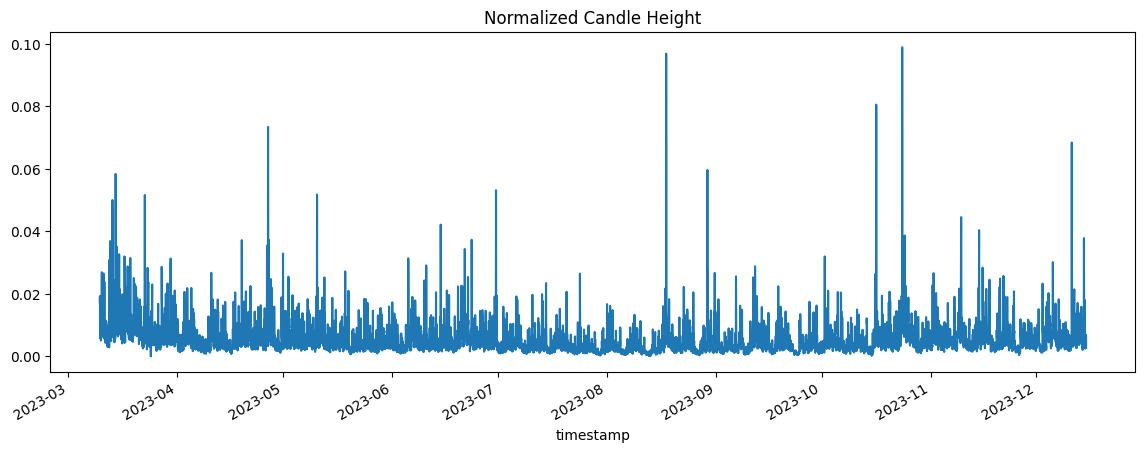

In [14]:
df["NormCandleHeight"].plot(figsize=(14,5), title="Normalized Candle Height")
plt.savefig('../plots/NormalCandleHeight.png')
plt.show()

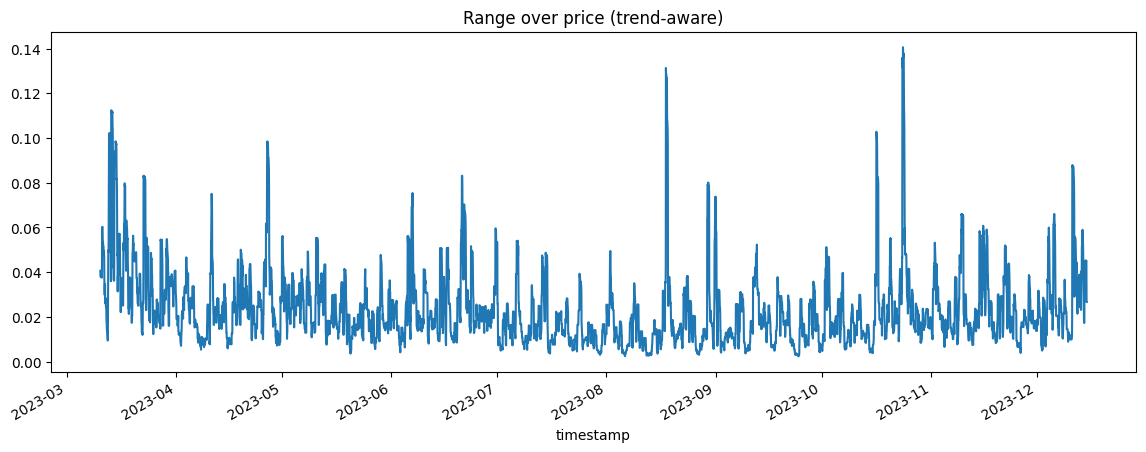

In [15]:
df["RangeOverPrice"].plot(figsize=(14,5), title="Range over price (trend-aware)")
plt.savefig('../plots/RangeOverPrice.png')
plt.show()

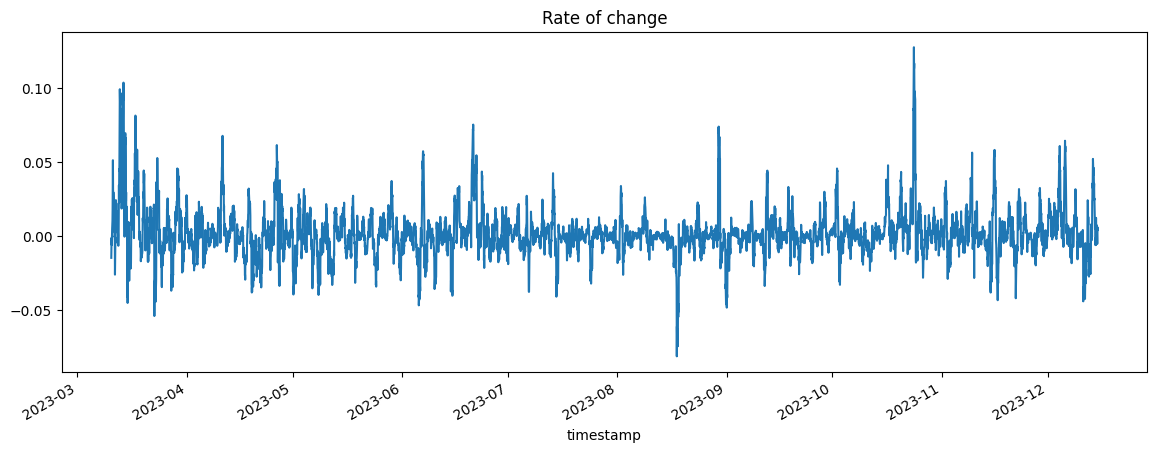

In [16]:
df["ROC"].plot(figsize=(14,5), title="Rate of change")
plt.savefig('../plots/ROC.png')
plt.show()

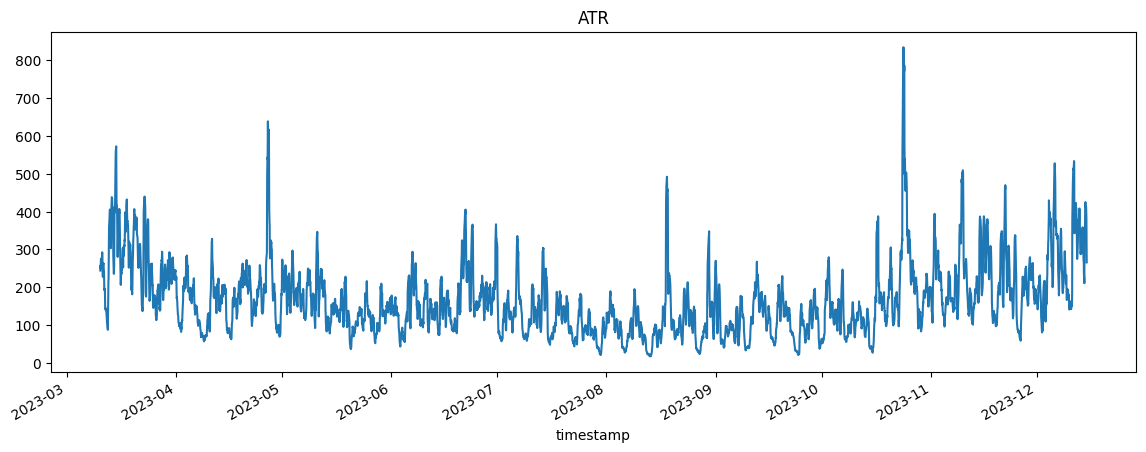

In [17]:
df["ATR"].plot(figsize=(14,5), title="ATR")
plt.savefig('../plots/ATR.png')
plt.show()

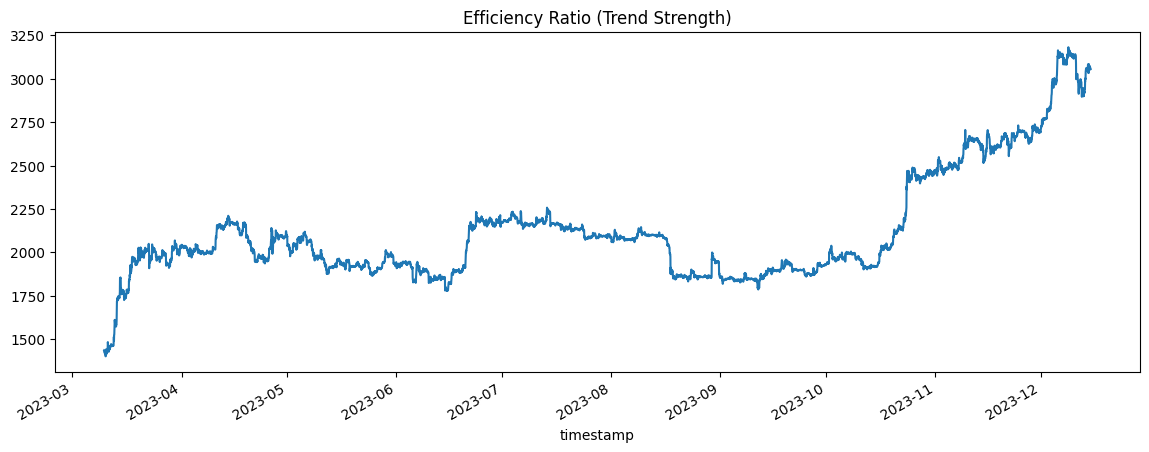

In [18]:
df["EfficiencyRatio"].plot(figsize=(14,5), title="Efficiency Ratio (Trend Strength)")
plt.savefig('../plots/EfficiencyRatio.png')
plt.show()

## Conclusion

This notebook shows how a handful of simple yet powerful volatility metrics can give insight into crypto market behavior.

Each one captures a different angle — from pure return dispersion to candle structure and trend strength.

In the next post, we'll explore more advanced models like EWMA, GARCH, and volatility clustering. Stay tuned!